# Customer Segmentation
#### - Sujay Pookkattuparambil

##  Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("OnlineRetail.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


## Checking for NaN values

In [3]:
df[df.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01-12-2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,01-12-2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,01-12-2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,01-12-2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,01-12-2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,09-12-2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,09-12-2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,09-12-2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,09-12-2011 10:26,10.79,NaN,United Kingdom


In [4]:
df.dropna(inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [5]:
df[df.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


## Checking for Quantity and Price > 0

In [6]:
df[df['Description'] == "Discount"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
9038,C537164,D,Discount,-1,05-12-2010 13:21,29.29,14527.0,United Kingdom
14498,C537597,D,Discount,-1,07-12-2010 12:34,281.00,15498.0,United Kingdom
19392,C537857,D,Discount,-1,08-12-2010 16:00,267.12,17340.0,United Kingdom
31134,C538897,D,Discount,-1,15-12-2010 09:14,5.76,16422.0,United Kingdom
...,...,...,...,...,...,...,...,...
479868,C577227,D,Discount,-1,18-11-2011 12:06,19.82,14527.0,United Kingdom
479869,C577227,D,Discount,-1,18-11-2011 12:06,16.76,14527.0,United Kingdom
493613,C578239,D,Discount,-1,23-11-2011 12:29,26.33,14912.0,Italy
516221,C579884,D,Discount,-1,30-11-2011 17:34,20.53,14527.0,United Kingdom


In [7]:
df[df['Quantity'] < 0][df[df['Quantity'] < 0]['Description'] != "Discount"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


In [8]:
df[df['Quantity'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [9]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [10]:
df[df['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,05-12-2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,16-12-2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,21-12-2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,06-01-2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,06-01-2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,13-01-2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,10-02-2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,23-03-2011 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,30-03-2011 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,04-04-2011 14:42,0.0,14410.0,United Kingdom


### Checking for one particular item for one particular customer as to how many times was it sequentially purchased and returned

In [11]:
item_flying_duck = df[df['StockCode'] == '35004C']
item_flying_duck

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
200,536389,35004C,SET OF 3 COLOURED FLYING DUCKS,6,01-12-2010 10:03,5.45,12431.0,Australia
297,536397,35004C,SET OF 3 COLOURED FLYING DUCKS,48,01-12-2010 10:51,4.65,17924.0,United Kingdom
2316,536576,35004C,SET OF 3 COLOURED FLYING DUCKS,120,01-12-2010 16:11,4.65,13777.0,United Kingdom
3933,536739,35004C,SET OF 3 COLOURED FLYING DUCKS,3,02-12-2010 13:08,5.45,14180.0,United Kingdom
6544,536947,35004C,SET OF 3 COLOURED FLYING DUCKS,3,03-12-2010 12:29,5.45,13013.0,United Kingdom
7417,537036,35004C,SET OF 3 COLOURED FLYING DUCKS,1,03-12-2010 17:28,5.45,15545.0,United Kingdom
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,05-12-2010 13:55,4.65,15311.0,United Kingdom
17311,537700,35004C,SET OF 3 COLOURED FLYING DUCKS,48,08-12-2010 10:51,4.65,18229.0,United Kingdom
17451,537762,35004C,SET OF 3 COLOURED FLYING DUCKS,3,08-12-2010 12:01,5.45,16558.0,United Kingdom


In [12]:
df.iloc[141]

InvoiceNo               C536379
StockCode                     D
Description            Discount
Quantity                     -1
InvoiceDate    01-12-2010 09:41
UnitPrice                  27.5
CustomerID              14527.0
Country          United Kingdom
Name: 141, dtype: object

In [13]:
df.iloc[140]

InvoiceNo                                  536381
StockCode                                   21523
Description    DOORMAT FANCY FONT HOME SWEET HOME
Quantity                                       10
InvoiceDate                      01-12-2010 09:41
UnitPrice                                    6.75
CustomerID                                15311.0
Country                            United Kingdom
Name: 140, dtype: object

In [14]:
item_flying_duck[item_flying_duck['CustomerID'] == 15311.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,05-12-2010 13:55,4.65,15311.0,United Kingdom
18196,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,08-12-2010 13:18,4.65,15311.0,United Kingdom
28630,538651,35004C,SET OF 3 COLOURED FLYING DUCKS,12,13-12-2010 15:07,4.65,15311.0,United Kingdom
39381,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,20-12-2010 15:27,4.65,15311.0,United Kingdom
44157,540157,35004C,SET OF 3 COLOURED FLYING DUCKS,12,05-01-2011 11:41,4.65,15311.0,United Kingdom
59542,541293,35004C,SET OF 3 COLOURED FLYING DUCKS,12,17-01-2011 13:39,4.65,15311.0,United Kingdom
78333,C542866,35004C,SET OF 3 COLOURED FLYING DUCKS,-2,01-02-2011 12:14,4.65,15311.0,United Kingdom


### So it seems that some customers are returning some products over time, hence not removing negative quantitiy values.

## Removing Duplicate Values

In [15]:
df.duplicated().sum()

np.int64(5225)

In [16]:
df[df.duplicated()==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01-12-2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,01-12-2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,01-12-2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,01-12-2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,01-12-2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,09-12-2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,09-12-2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,09-12-2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,09-12-2011 11:34,2.10,14446.0,United Kingdom


In [17]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [18]:
df['CustomerID'] = df['CustomerID'].astype(int)

In [19]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680,France


## Plotting country-wise number of orders

In [20]:
import seaborn as sns

In [21]:
df.Country.value_counts()

Country
United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


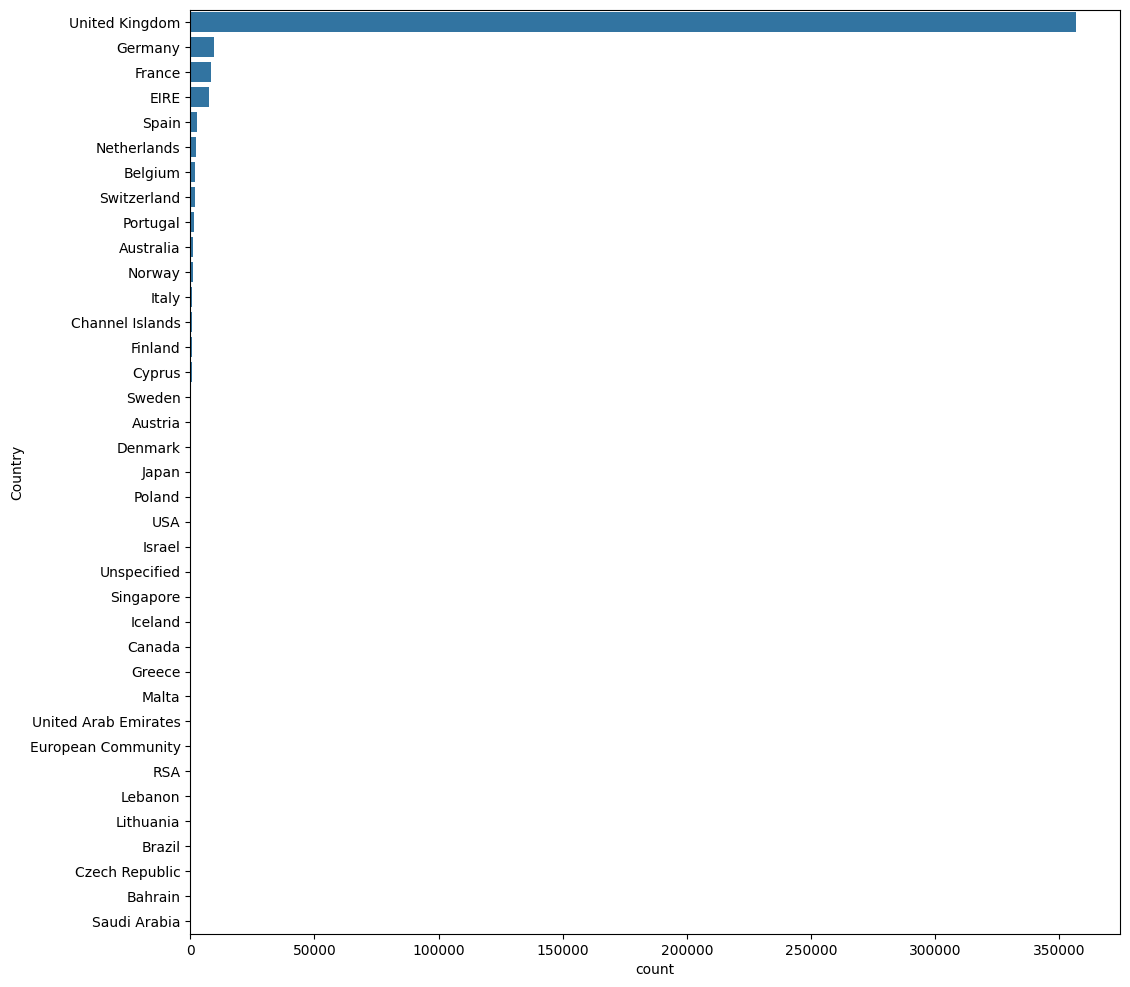

In [22]:
plt.figure(figsize=(12, 12))
sns.barplot(x=df.Country.value_counts(),y=df.Country.value_counts().index)
plt.show()

## Creating Country Classes

In [23]:
df['Country_class'] = df['Country']

In [24]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country_class
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,United Kingdom,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,United Kingdom,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680,France,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680,France,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680,France,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680,France,France


In [25]:
country_list = list(df['Country_class'].unique())
country_list

['United Kingdom',
 'France',
 'Australia',
 'Netherlands',
 'Germany',
 'Norway',
 'EIRE',
 'Switzerland',
 'Spain',
 'Poland',
 'Portugal',
 'Italy',
 'Belgium',
 'Lithuania',
 'Japan',
 'Iceland',
 'Channel Islands',
 'Denmark',
 'Cyprus',
 'Sweden',
 'Austria',
 'Israel',
 'Finland',
 'Greece',
 'Singapore',
 'Lebanon',
 'United Arab Emirates',
 'Saudi Arabia',
 'Czech Republic',
 'Canada',
 'Unspecified',
 'Brazil',
 'USA',
 'European Community',
 'Bahrain',
 'Malta',
 'RSA']

In [26]:
len(country_list)

37

In [27]:
df['Country_class'].replace(country_list, range(len(country_list)), inplace=True)
df

C:\Users\sujay\AppData\Local\Temp\ipykernel_5920\1078388465.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country_class'].replace(country_list, range(len(country_list)), inplace=True)
C:\Users\sujay\AppData\Local\Temp\ipykernel_5920\1078388465.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tru

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country_class
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680,France,1
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680,France,1
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680,France,1
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680,France,1


## Calculating Total Price for each row

In [28]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country_class,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,United Kingdom,0,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680,France,1,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680,France,1,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680,France,1,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680,France,1,16.60


In [29]:
df[df['TotalPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country_class,TotalPrice
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527,United Kingdom,0,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311,United Kingdom,0,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548,United Kingdom,0,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548,United Kingdom,0,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548,United Kingdom,0,-6.96
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397,United Kingdom,0,-9.13
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498,United Kingdom,0,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311,United Kingdom,0,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315,United Kingdom,0,-1.25


## Converting InvoiceDate to datetime object

In [30]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%d-%m-%Y %H:%M")

In [31]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 401604, dtype: datetime64[ns]

In [32]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country_class,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,1,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,1,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,1,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,1,16.60


## Grouping based on CustomerID

### Calculating mean of gap between each viait

In [33]:
customer_group=df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: x.diff().mean().days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum',
    'Country_class': 'last'
}).rename(columns={'InvoiceDate': 'VisitGapMean', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

In [34]:
customer_group

,VisitGapMean,Frequency,Monetary,Country_class
CustomerID,,,,
12346,0.0,2,0.00,0
12347,2.0,182,4310.00,15
12348,9.0,31,1797.24,22
12349,0.0,73,1757.55,11
12350,0.0,17,334.40,5
...,...,...,...,...
18280,0.0,10,180.60,0
18281,0.0,7,80.82,0
18282,9.0,13,176.60,0


## Checking for nans after grouping

In [35]:
customer_group[customer_group.isna().any(axis=1)]

,VisitGapMean,Frequency,Monetary,Country_class
CustomerID,,,,
12503,NaN,1,-1126.00,8
12505,NaN,1,-4.50,11
12943,NaN,1,-3.75,0
13017,NaN,1,204.00,0
13099,NaN,1,207.36,0
...,...,...,...,...
18113,NaN,1,76.32,0
18141,NaN,1,-35.40,0
18174,NaN,1,104.00,0


### Checking if the nan values have any other frequency other than 1

In [36]:
customer_group[customer_group.isna().any(axis=1)]['Frequency'].unique()

array([1])

### Filling the nan values with 0 since their frequency was 1

In [37]:
customer_group.fillna(0, inplace=True)
customer_group

,VisitGapMean,Frequency,Monetary,Country_class
CustomerID,,,,
12346,0.0,2,0.00,0
12347,2.0,182,4310.00,15
12348,9.0,31,1797.24,22
12349,0.0,73,1757.55,11
12350,0.0,17,334.40,5
...,...,...,...,...
18280,0.0,10,180.60,0
18281,0.0,7,80.82,0
18282,9.0,13,176.60,0


In [38]:
customer_group[customer_group.isna().any(axis=1)]

,VisitGapMean,Frequency,Monetary,Country_class
CustomerID,,,,


#### Plotting VisitGapMean, Frequency, Monetary against each other to see distribution poins

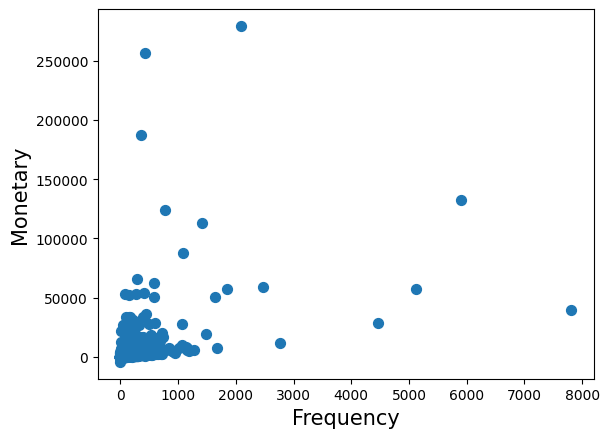

In [39]:
plt.scatter(customer_group['Frequency'], customer_group['Monetary'], s=50)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Monetary', fontsize=15)
plt.show()

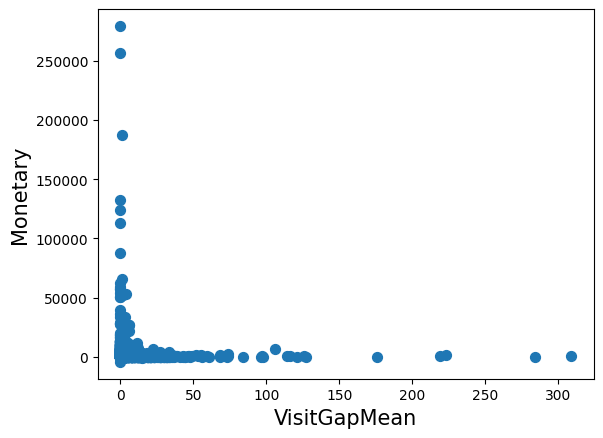

In [40]:
plt.scatter(customer_group['VisitGapMean'], customer_group['Monetary'], s=50)
plt.xlabel('VisitGapMean', fontsize=15)
plt.ylabel('Monetary', fontsize=15)
plt.show()

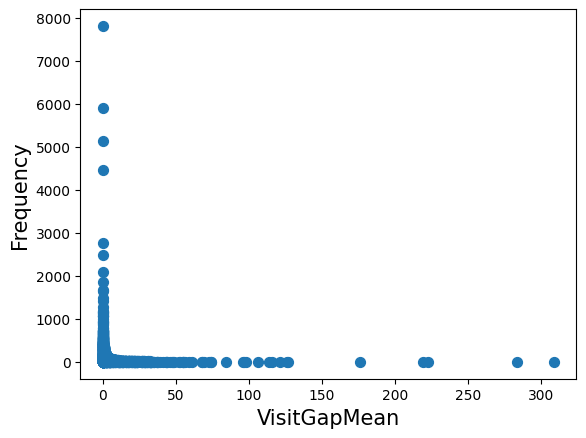

In [41]:
plt.scatter(customer_group['VisitGapMean'], customer_group['Frequency'], s=50)
plt.xlabel('VisitGapMean', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [42]:
customer_group['VisitGapMean'] = customer_group['VisitGapMean'].astype(np.int32)

In [43]:
customer_group

,VisitGapMean,Frequency,Monetary,Country_class
CustomerID,,,,
12346,0,2,0.00,0
12347,2,182,4310.00,15
12348,9,31,1797.24,22
12349,0,73,1757.55,11
12350,0,17,334.40,5
...,...,...,...,...
18280,0,10,180.60,0
18281,0,7,80.82,0
18282,9,13,176.60,0


## Describing and Exploring the transformed data

In [44]:
customer_group.describe()

,VisitGapMean,Frequency,Monetary,Country_class
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,3.043687,91.858188,1893.531433,0.850869
std,11.375746,229.223566,8218.696204,3.628567
min,0.000000,1.000000,-4287.630000,0.000000
25%,0.000000,17.000000,291.795000,0.000000
50%,1.000000,41.000000,644.070000,0.000000
75%,3.000000,99.250000,1608.335000,0.000000
max,309.000000,7812.000000,279489.020000,36.000000


In [45]:
customer_group.corr()

,VisitGapMean,Frequency,Monetary,Country_class
VisitGapMean,1.000000,-0.069538,-0.025536,-0.026889
Frequency,-0.069538,1.000000,0.449659,-0.008940
Monetary,-0.025536,0.449659,1.000000,0.019689
Country_class,-0.026889,-0.008940,0.019689,1.000000


### Correlation Heatmap

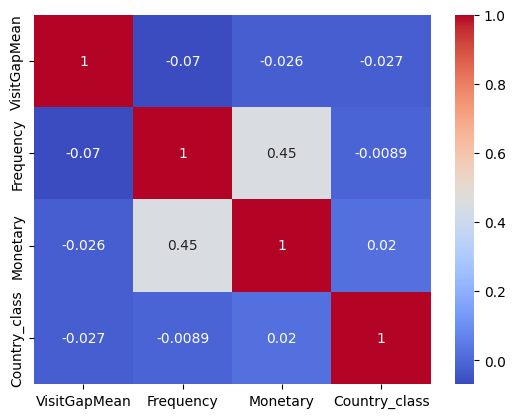

In [46]:
sns.heatmap(customer_group.corr(), annot=True, cmap='coolwarm')
plt.show()

C:\Users\sujay\AppData\Local\Temp\ipykernel_5920\577080937.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_group[feature], ax=axes[i])
C:\Users\sujay\AppData\Local\Temp\ipykernel_5920\577080937.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_group[feature], ax=axes[i])


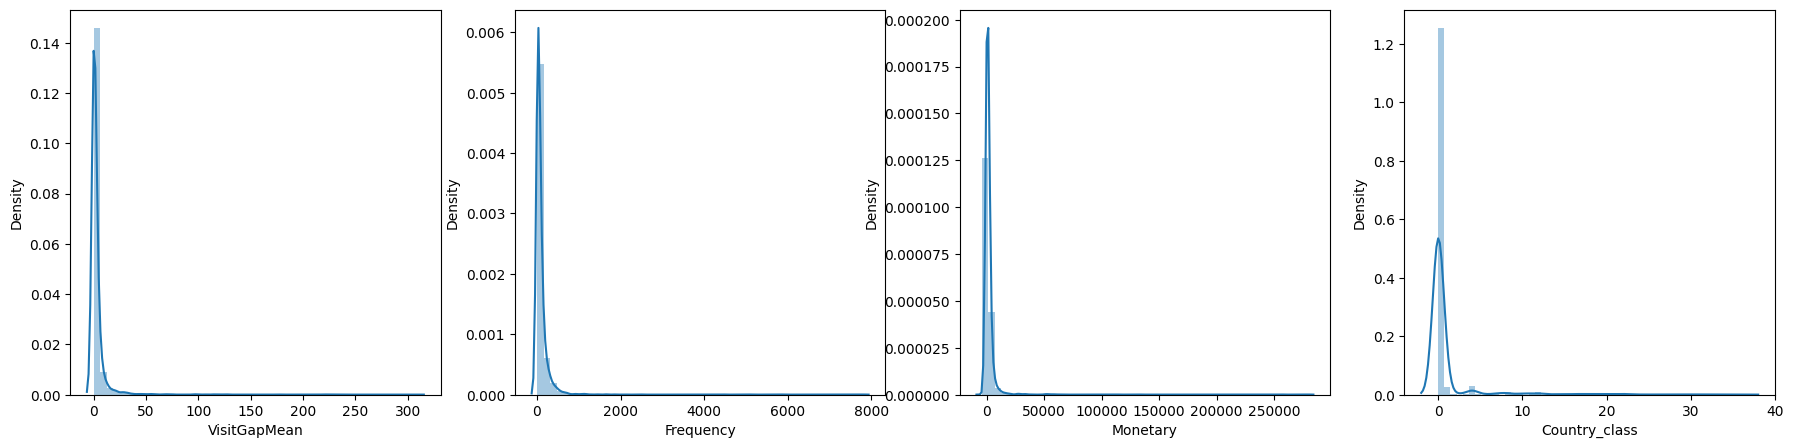

In [47]:
fig, axes = plt.subplots(1, 4, figsize=(22, 5))
for i, feature in enumerate(list(customer_group.columns)):
    sns.distplot(customer_group[feature], ax=axes[i])

#### Data seems to be heavily skewed. Many recommend log transformation for positively skewed data, where most values are concentrated towards the lower end.

In [48]:
customer_group_log = np.log(customer_group)
customer_group_log

D:\Anaconda3\envs\pmlapp_env\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
D:\Anaconda3\envs\pmlapp_env\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,VisitGapMean,Frequency,Monetary,Country_class
CustomerID,,,,
12346,-inf,0.693147,-inf,-inf
12347,0.693147,5.204007,8.368693,2.708050
12348,2.197225,3.433987,7.494007,3.091042
12349,-inf,4.290459,7.471676,2.397895
12350,-inf,2.833213,5.812338,1.609438
...,...,...,...,...
18280,-inf,2.302585,5.196285,-inf
18281,-inf,1.945910,4.392224,-inf
18282,2.197225,2.564949,5.173887,-inf


In [49]:
customer_group_log[customer_group_log.isna().any(axis=1)]

,VisitGapMean,Frequency,Monetary,Country_class
CustomerID,,,,
12503,-inf,0.000000,NaN,2.079442
12505,-inf,0.000000,NaN,2.397895
12605,-inf,1.098612,NaN,1.386294
12666,-inf,0.693147,NaN,3.044522
12870,-inf,0.693147,NaN,-inf
12943,-inf,0.000000,NaN,-inf
13154,-inf,0.000000,NaN,-inf
13672,0.693147,2.772589,NaN,-inf
13693,-inf,1.386294,NaN,-inf


#### Since log tansformation is giving a lot of inf and NaN values, we will use the next recommended method Box-cox. But since Box-Cox only works with positive values and since our data has negative values, we will use Yeo-Johnson Transformation which is similar to Box-Cox but works with negative data as well. The sklearn implementation also allows to normalize the data using Zero Mean and Unit Variance normalization but we will not be using that for now as we don't want box-cox for categorical features.

In [50]:
from sklearn.preprocessing import PowerTransformer

In [51]:
pt = PowerTransformer(method='yeo-johnson', standardize=False)

In [52]:
customer_group_bc = pt.fit_transform(customer_group)
customer_group_bc

array([[-0.00000000e+00,  1.10407779e+00,  0.00000000e+00,
        -0.00000000e+00],
       [ 7.63249155e-01,  5.33391715e+00,  8.40790040e+02,
         1.91200575e-01],
       [ 1.13496441e+00,  3.52051769e+00,  4.26594168e+02,
         1.91200657e-01],
       ...,
       [ 1.13496441e+00,  2.67074262e+00,  6.99675154e+01,
        -0.00000000e+00],
       [-0.00000000e+00,  6.78149048e+00,  4.71664460e+02,
        -0.00000000e+00],
       [ 7.63249155e-01,  4.34575254e+00,  4.33952889e+02,
        -0.00000000e+00]])

In [53]:
customer_group_bc = pd.DataFrame(customer_group_bc, columns=customer_group.columns, index=customer_group.index)
customer_group_bc

,VisitGapMean,Frequency,Monetary,Country_class
CustomerID,,,,
12346,-0.000000,1.104078,0.000000,-0.000000
12347,0.763249,5.333917,840.790040,0.191201
12348,1.134964,3.520518,426.594168,0.191201
12349,-0.000000,4.388769,419.263182,0.191200
12350,-0.000000,2.928408,115.292898,0.191184
...,...,...,...,...
18280,-0.000000,2.424035,71.207090,-0.000000
18281,-0.000000,2.099081,37.812596,-0.000000
18282,1.134964,2.670743,69.967515,-0.000000


In [54]:
customer_group_bc.max()

VisitGapMean         1.386612
Frequency            9.336156
Monetary         21291.249136
Country_class        0.191201
dtype: float64

In [55]:
customer_group_bc.min()

VisitGapMean        -0.000000
Frequency            0.695320
Monetary        -23105.910503
Country_class       -0.000000
dtype: float64

#### Replotting the density plots

C:\Users\sujay\AppData\Local\Temp\ipykernel_5920\893677534.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_group_bc[feature], ax=axes[i])
C:\Users\sujay\AppData\Local\Temp\ipykernel_5920\893677534.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_group_bc[feature], ax=axe

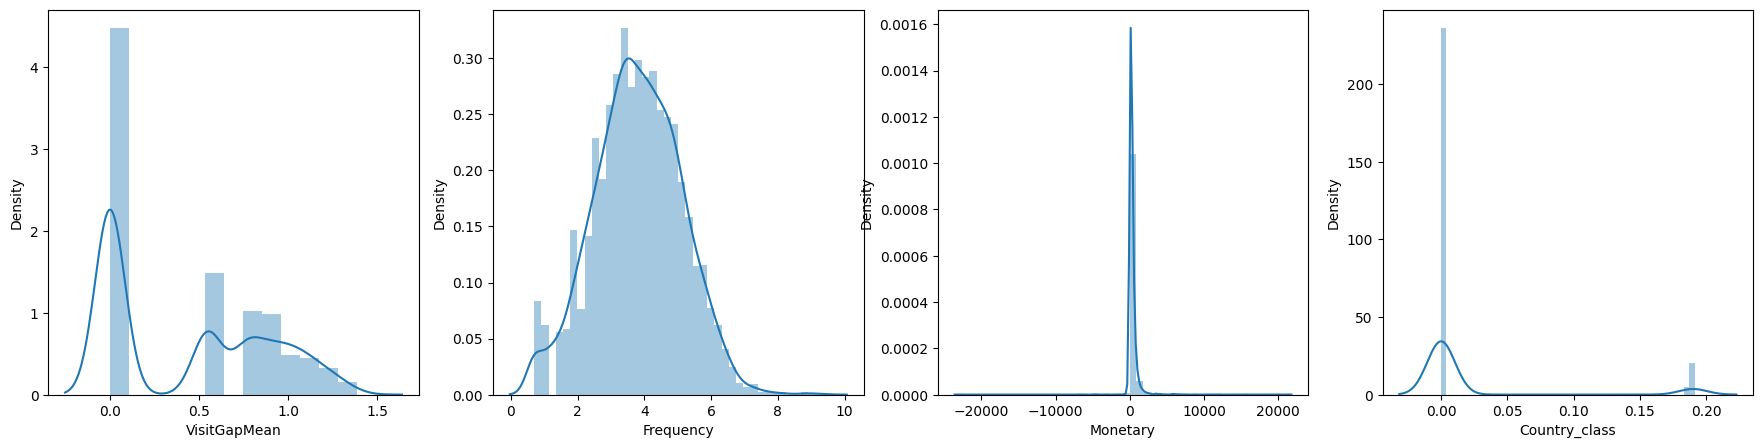

In [56]:
fig, axes = plt.subplots(1, 4, figsize=(22, 5))
for i, feature in enumerate(list(customer_group_bc.columns)):
    sns.distplot(customer_group_bc[feature], ax=axes[i])

#### Since Box-cox is not applicable to categorical data replacing it with original values.

In [57]:
customer_group_bc['Country_class'] = customer_group['Country_class']

In [58]:
customer_group_bc

,VisitGapMean,Frequency,Monetary,Country_class
CustomerID,,,,
12346,-0.000000,1.104078,0.000000,0
12347,0.763249,5.333917,840.790040,15
12348,1.134964,3.520518,426.594168,22
12349,-0.000000,4.388769,419.263182,11
12350,-0.000000,2.928408,115.292898,5
...,...,...,...,...
18280,-0.000000,2.424035,71.207090,0
18281,-0.000000,2.099081,37.812596,0
18282,1.134964,2.670743,69.967515,0


## Scaling the data using StandardScaler

In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [60]:
scaler = StandardScaler()

In [61]:
customer_group_bc_norm = scaler.fit_transform(customer_group_bc)
customer_group_bc_norm

array([[-0.9669464 , -2.07742208, -0.3979844 , -0.23451861],
       [ 0.72677594,  1.17528637,  0.57365906,  3.89981749],
       [ 1.55164738, -0.21920152,  0.09500126,  5.82917433],
       ...,
       [ 1.55164738, -0.87267091, -0.31712774, -0.23451861],
       [-0.9669464 ,  2.28845725,  0.14708591, -0.23451861],
       [ 0.72677594,  0.41539667,  0.10350523, -0.23451861]])

In [62]:
customer_group_bc_norm_df = pd.DataFrame(customer_group_bc_norm, columns=customer_group.columns, index=customer_group.index)
customer_group_bc_norm_df

,VisitGapMean,Frequency,Monetary,Country_class
CustomerID,,,,
12346,-0.966946,-2.077422,-0.397984,-0.234519
12347,0.726776,1.175286,0.573659,3.899817
12348,1.551647,-0.219202,0.095001,5.829174
12349,-0.966946,0.448476,0.086529,2.797328
12350,-0.966946,-0.674529,-0.264748,1.143593
...,...,...,...,...
18280,-0.966946,-1.062387,-0.315695,-0.234519
18281,-0.966946,-1.312274,-0.354287,-0.234519
18282,1.551647,-0.872671,-0.317128,-0.234519


C:\Users\sujay\AppData\Local\Temp\ipykernel_5920\3932487511.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_group_bc_norm_df[feature], ax=axes[i])
C:\Users\sujay\AppData\Local\Temp\ipykernel_5920\3932487511.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_group_bc_norm_d

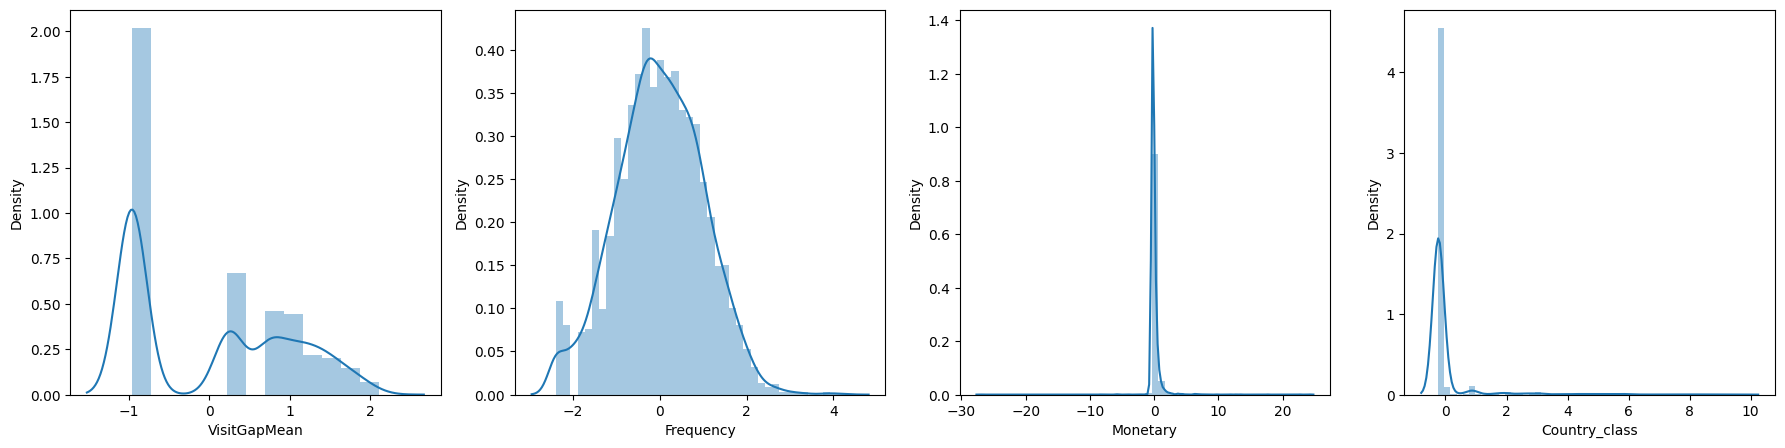

In [63]:
fig, axes = plt.subplots(1, 4, figsize=(22, 5))
for i, feature in enumerate(list(customer_group_bc_norm_df.columns)):
    sns.distplot(customer_group_bc_norm_df[feature], ax=axes[i])

## Finally fitting the kmeans algorithm on the transformed data

In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [65]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [66]:
kmns_preds = kmeans.fit_predict(customer_group_bc_norm)
kmns_preds

array([1, 2, 2, ..., 0, 3, 0], dtype=int32)

### Trying Kmeans with different values of k

In [67]:
inertia_list = []
silhouette_scores = []

for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customer_group_bc_norm)
    cluster_preds = kmeans.fit_predict(customer_group_bc_norm)
    
    silh_score = silhouette_score(customer_group_bc_norm, cluster_preds, random_state=42)
    silhouette_scores.append(silh_score)
    
    print(f"For k = {i}, Silhouette Score = {silh_score}")
    
    inertia_list.append(kmeans.inertia_)

For k = 2, Silhouette Score = 0.392903526351156
For k = 3, Silhouette Score = 0.42486597259947845
For k = 4, Silhouette Score = 0.457170931711404
For k = 5, Silhouette Score = 0.45059192180931
For k = 6, Silhouette Score = 0.4489007255078234
For k = 7, Silhouette Score = 0.44080191428507753
For k = 8, Silhouette Score = 0.44309890518001865
For k = 9, Silhouette Score = 0.44864034085062093
For k = 10, Silhouette Score = 0.45071208624299763
For k = 11, Silhouette Score = 0.43749984487148236
For k = 12, Silhouette Score = 0.4163279124103019
For k = 13, Silhouette Score = 0.4175331232223808
For k = 14, Silhouette Score = 0.39626465574288033
For k = 15, Silhouette Score = 0.38332804995959086
For k = 16, Silhouette Score = 0.3927605013887182
For k = 17, Silhouette Score = 0.38606542119212833
For k = 18, Silhouette Score = 0.3867666295708535
For k = 19, Silhouette Score = 0.3910613012467336
For k = 20, Silhouette Score = 0.3949668222981798


#### Plotting Silhouette values for different values of k

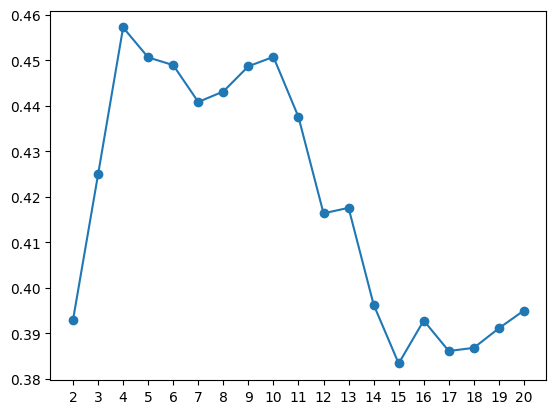

In [68]:
plt.plot(list(range(2, 21)), silhouette_scores, marker="o")
plt.xticks(list(range(2, 21)))
plt.show()

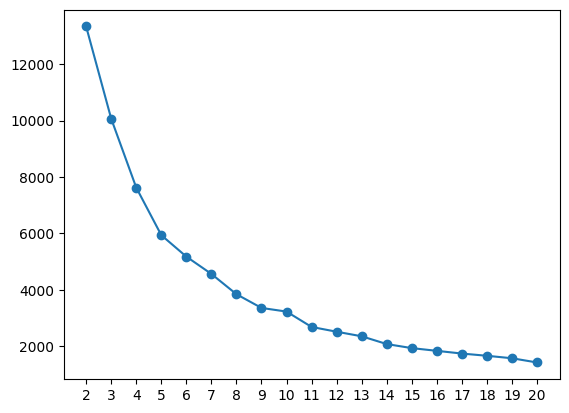

In [69]:
plt.plot(list(range(2, 21)), inertia_list, marker="o")
plt.xticks(list(range(2, 21)))
plt.show()

## Now, instead of using a range of classes for countries, let's try doing everything as above but before scaling adding dummy variables for each country

In [70]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country_class,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,1,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,1,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,1,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,1,16.60


In [71]:
customer_group2 = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: x.diff().mean().days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum',
    'Country': 'last'
}).rename(columns={'InvoiceDate': 'VisitGapMean', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

In [72]:
customer_group2

,VisitGapMean,Frequency,Monetary,Country
CustomerID,,,,
12346,0.0,2,0.00,United Kingdom
12347,2.0,182,4310.00,Iceland
12348,9.0,31,1797.24,Finland
12349,0.0,73,1757.55,Italy
12350,0.0,17,334.40,Norway
...,...,...,...,...
18280,0.0,10,180.60,United Kingdom
18281,0.0,7,80.82,United Kingdom
18282,9.0,13,176.60,United Kingdom


## Now creating dummy variables of country data and doing the same process as above and then trying kmeans again

In [73]:
customer_group2_country_dummies = pd.get_dummies(customer_group2['Country'], drop_first=True, dtype='int')

In [74]:
customer_group2_country_dummies

,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,EIRE,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [75]:
customer_group2.drop(['Country'], axis=1, inplace=True)
customer_group2

,VisitGapMean,Frequency,Monetary
CustomerID,,,
12346,0.0,2,0.00
12347,2.0,182,4310.00
12348,9.0,31,1797.24
12349,0.0,73,1757.55
12350,0.0,17,334.40
...,...,...,...
18280,0.0,10,180.60
18281,0.0,7,80.82
18282,9.0,13,176.60


## Checking for nans after grouping

In [76]:
customer_group2[customer_group2.isna().any(axis=1)]

,VisitGapMean,Frequency,Monetary
CustomerID,,,
12503,NaN,1,-1126.00
12505,NaN,1,-4.50
12943,NaN,1,-3.75
13017,NaN,1,204.00
13099,NaN,1,207.36
...,...,...,...
18113,NaN,1,76.32
18141,NaN,1,-35.40
18174,NaN,1,104.00


### Checking if the nan values have any other frequency other than 1

In [77]:
customer_group2[customer_group2.isna().any(axis=1)]['Frequency'].unique()

array([1])

### Filling the nan values with 0 since their frequency was 1

In [78]:
customer_group2.fillna(0, inplace=True)
customer_group2

,VisitGapMean,Frequency,Monetary
CustomerID,,,
12346,0.0,2,0.00
12347,2.0,182,4310.00
12348,9.0,31,1797.24
12349,0.0,73,1757.55
12350,0.0,17,334.40
...,...,...,...
18280,0.0,10,180.60
18281,0.0,7,80.82
18282,9.0,13,176.60


In [79]:
customer_group2[customer_group2.isna().any(axis=1)]

,VisitGapMean,Frequency,Monetary
CustomerID,,,


In [80]:
customer_group2['VisitGapMean'] = customer_group2['VisitGapMean'].astype(np.int32)

In [81]:
customer_group2

,VisitGapMean,Frequency,Monetary
CustomerID,,,
12346,0,2,0.00
12347,2,182,4310.00
12348,9,31,1797.24
12349,0,73,1757.55
12350,0,17,334.40
...,...,...,...
18280,0,10,180.60
18281,0,7,80.82
18282,9,13,176.60


In [82]:
from sklearn.preprocessing import PowerTransformer

In [83]:
pt = PowerTransformer(method='yeo-johnson', standardize=False)

In [84]:
customer_group2_bc = pt.fit_transform(customer_group2)
customer_group2_bc

array([[-0.00000000e+00,  1.10407779e+00,  0.00000000e+00],
       [ 7.63249155e-01,  5.33391715e+00,  8.40790040e+02],
       [ 1.13496441e+00,  3.52051769e+00,  4.26594168e+02],
       ...,
       [ 1.13496441e+00,  2.67074262e+00,  6.99675154e+01],
       [-0.00000000e+00,  6.78149048e+00,  4.71664460e+02],
       [ 7.63249155e-01,  4.34575254e+00,  4.33952889e+02]])

In [85]:
customer_group2_bc = pd.DataFrame(customer_group2_bc, columns=customer_group2.columns, index=customer_group2.index)
customer_group2_bc

,VisitGapMean,Frequency,Monetary
CustomerID,,,
12346,-0.000000,1.104078,0.000000
12347,0.763249,5.333917,840.790040
12348,1.134964,3.520518,426.594168
12349,-0.000000,4.388769,419.263182
12350,-0.000000,2.928408,115.292898
...,...,...,...
18280,-0.000000,2.424035,71.207090
18281,-0.000000,2.099081,37.812596
18282,1.134964,2.670743,69.967515


In [86]:
customer_group2_bc.max()

VisitGapMean        1.386612
Frequency           9.336156
Monetary        21291.249136
dtype: float64

In [87]:
customer_group2_bc.min()

VisitGapMean       -0.000000
Frequency           0.695320
Monetary       -23105.910503
dtype: float64

#### Appending the dummies for Counntries

In [88]:
customer_group2_bc = pd.concat([customer_group2_bc, customer_group2_country_dummies], axis=1)
customer_group2_bc

,VisitGapMean,Frequency,Monetary,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,-0.000000,1.104078,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12347,0.763249,5.333917,840.790040,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,1.134964,3.520518,426.594168,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349,-0.000000,4.388769,419.263182,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350,-0.000000,2.928408,115.292898,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,-0.000000,2.424035,71.207090,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18281,-0.000000,2.099081,37.812596,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18282,1.134964,2.670743,69.967515,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Scaling the data using StandardScaler

In [89]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [90]:
scaler2 = StandardScaler()

In [91]:
customer_group2_bc_norm = scaler2.fit_transform(customer_group2_bc)
customer_group2_bc_norm

array([[-0.9669464 , -2.07742208, -0.3979844 , ..., -0.02139313,
         0.32685692, -0.03026138],
       [ 0.72677594,  1.17528637,  0.57365906, ..., -0.02139313,
        -3.05944269, -0.03026138],
       [ 1.55164738, -0.21920152,  0.09500126, ..., -0.02139313,
        -3.05944269, -0.03026138],
       ...,
       [ 1.55164738, -0.87267091, -0.31712774, ..., -0.02139313,
         0.32685692, -0.03026138],
       [-0.9669464 ,  2.28845725,  0.14708591, ..., -0.02139313,
         0.32685692, -0.03026138],
       [ 0.72677594,  0.41539667,  0.10350523, ..., -0.02139313,
         0.32685692, -0.03026138]])

In [92]:
customer_group_bc2_norm_df = pd.DataFrame(customer_group2_bc_norm, columns=customer_group2_bc.columns, index=customer_group2_bc.index)
customer_group_bc2_norm_df

,VisitGapMean,Frequency,Monetary,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,-0.966946,-2.077422,-0.397984,-0.045418,-0.021393,-0.072723,-0.015125,-0.030261,-0.045418,-0.037071,...,-0.015125,-0.015125,-0.015125,-0.083122,-0.042816,-0.067791,-0.030261,-0.021393,0.326857,-0.030261
12347,0.726776,1.175286,0.573659,-0.045418,-0.021393,-0.072723,-0.015125,-0.030261,-0.045418,-0.037071,...,-0.015125,-0.015125,-0.015125,-0.083122,-0.042816,-0.067791,-0.030261,-0.021393,-3.059443,-0.030261
12348,1.551647,-0.219202,0.095001,-0.045418,-0.021393,-0.072723,-0.015125,-0.030261,-0.045418,-0.037071,...,-0.015125,-0.015125,-0.015125,-0.083122,-0.042816,-0.067791,-0.030261,-0.021393,-3.059443,-0.030261
12349,-0.966946,0.448476,0.086529,-0.045418,-0.021393,-0.072723,-0.015125,-0.030261,-0.045418,-0.037071,...,-0.015125,-0.015125,-0.015125,-0.083122,-0.042816,-0.067791,-0.030261,-0.021393,-3.059443,-0.030261
12350,-0.966946,-0.674529,-0.264748,-0.045418,-0.021393,-0.072723,-0.015125,-0.030261,-0.045418,-0.037071,...,-0.015125,-0.015125,-0.015125,-0.083122,-0.042816,-0.067791,-0.030261,-0.021393,-3.059443,-0.030261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,-0.966946,-1.062387,-0.315695,-0.045418,-0.021393,-0.072723,-0.015125,-0.030261,-0.045418,-0.037071,...,-0.015125,-0.015125,-0.015125,-0.083122,-0.042816,-0.067791,-0.030261,-0.021393,0.326857,-0.030261
18281,-0.966946,-1.312274,-0.354287,-0.045418,-0.021393,-0.072723,-0.015125,-0.030261,-0.045418,-0.037071,...,-0.015125,-0.015125,-0.015125,-0.083122,-0.042816,-0.067791,-0.030261,-0.021393,0.326857,-0.030261
18282,1.551647,-0.872671,-0.317128,-0.045418,-0.021393,-0.072723,-0.015125,-0.030261,-0.045418,-0.037071,...,-0.015125,-0.015125,-0.015125,-0.083122,-0.042816,-0.067791,-0.030261,-0.021393,0.326857,-0.030261


## Finally fitting the kmeans algorithm on the transformed data

In [93]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [94]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [95]:
kmns_preds = kmeans.fit_predict(customer_group2_bc_norm)
kmns_preds

array([1, 3, 3, ..., 0, 0, 0], dtype=int32)

### Trying Kmeans with different values of k

In [96]:
inertia_list = []
silhouette_scores = []

for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customer_group2_bc_norm)
    cluster_preds = kmeans.fit_predict(customer_group2_bc_norm)
    
    silh_score = silhouette_score(customer_group2_bc_norm, cluster_preds, random_state=42)
    silhouette_scores.append(silh_score)
    
    print(f"For k = {i}, Silhouette Score = {silh_score}")
    
    inertia_list.append(kmeans.inertia_)

For k = 2, Silhouette Score = 0.2280158854498247
For k = 3, Silhouette Score = 0.26300474715615324
For k = 4, Silhouette Score = 0.36705112066801265
For k = 5, Silhouette Score = 0.3679923699786309
For k = 6, Silhouette Score = 0.3707140416384599
For k = 7, Silhouette Score = 0.37101052444281685
For k = 8, Silhouette Score = 0.4129764347676288
For k = 9, Silhouette Score = 0.4146917837112247
For k = 10, Silhouette Score = 0.41954469158467883
For k = 11, Silhouette Score = 0.4220494071321814
For k = 12, Silhouette Score = 0.4191656737449672
For k = 13, Silhouette Score = 0.43431547006798815
For k = 14, Silhouette Score = 0.4304328416832932
For k = 15, Silhouette Score = 0.43221436532213486
For k = 16, Silhouette Score = 0.3749550501428001
For k = 17, Silhouette Score = 0.38849478496544626
For k = 18, Silhouette Score = 0.39365522334311087
For k = 19, Silhouette Score = 0.4008663573000549
For k = 20, Silhouette Score = 0.4052420048605971


#### Checking for more values of k, since it seems to be giving a higher silhouette score towards the end

In [97]:
inertia_list = []
silhouette_scores = []

for i in range(2, 51):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customer_group2_bc_norm)
    cluster_preds = kmeans.fit_predict(customer_group2_bc_norm)
    
    silh_score = silhouette_score(customer_group2_bc_norm, cluster_preds, random_state=42)
    silhouette_scores.append(silh_score)
    
    print(f"For k = {i}, Silhouette Score = {silh_score}")
    
    inertia_list.append(kmeans.inertia_)

For k = 2, Silhouette Score = 0.2280158854498247
For k = 3, Silhouette Score = 0.26300474715615324
For k = 4, Silhouette Score = 0.36705112066801265
For k = 5, Silhouette Score = 0.3679923699786309
For k = 6, Silhouette Score = 0.3707140416384599
For k = 7, Silhouette Score = 0.37101052444281685
For k = 8, Silhouette Score = 0.4129764347676288
For k = 9, Silhouette Score = 0.4146917837112247
For k = 10, Silhouette Score = 0.41954469158467883
For k = 11, Silhouette Score = 0.4220494071321814
For k = 12, Silhouette Score = 0.4191656737449672
For k = 13, Silhouette Score = 0.43431547006798815
For k = 14, Silhouette Score = 0.4304328416832932
For k = 15, Silhouette Score = 0.43221436532213486
For k = 16, Silhouette Score = 0.3749550501428001
For k = 17, Silhouette Score = 0.38849478496544626
For k = 18, Silhouette Score = 0.39365522334311087
For k = 19, Silhouette Score = 0.4008663573000549
For k = 20, Silhouette Score = 0.4052420048605971
For k = 21, Silhouette Score = 0.41266152346352386

#### Plotting Silhouette values for different values of k

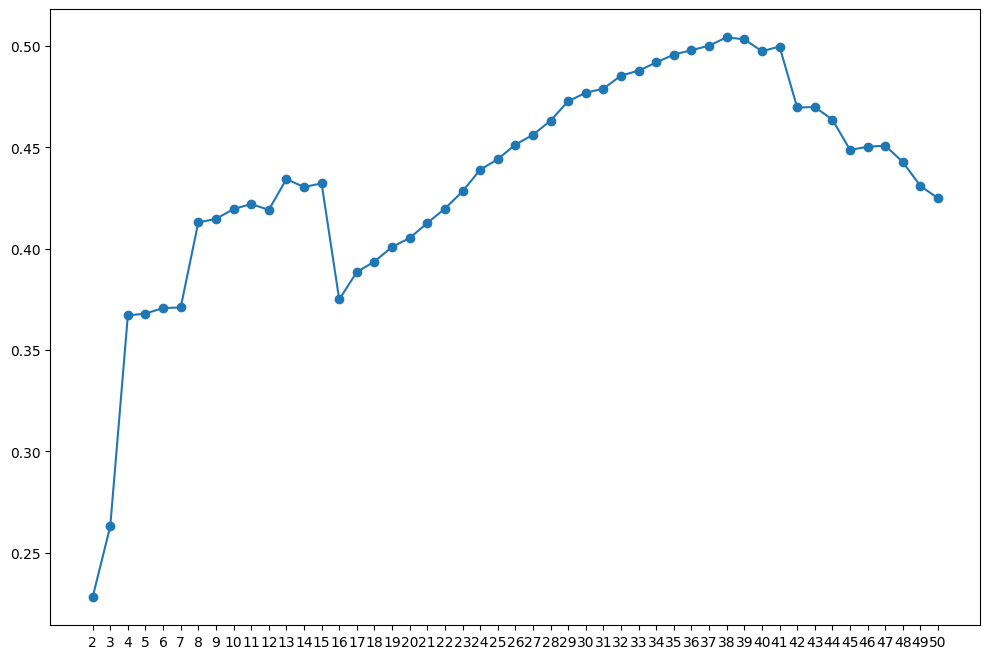

In [98]:
plt.figure(figsize=(12, 8))
plt.plot(list(range(2, 51)), silhouette_scores, marker="o")
plt.xticks(list(range(2, 51)))
plt.show()

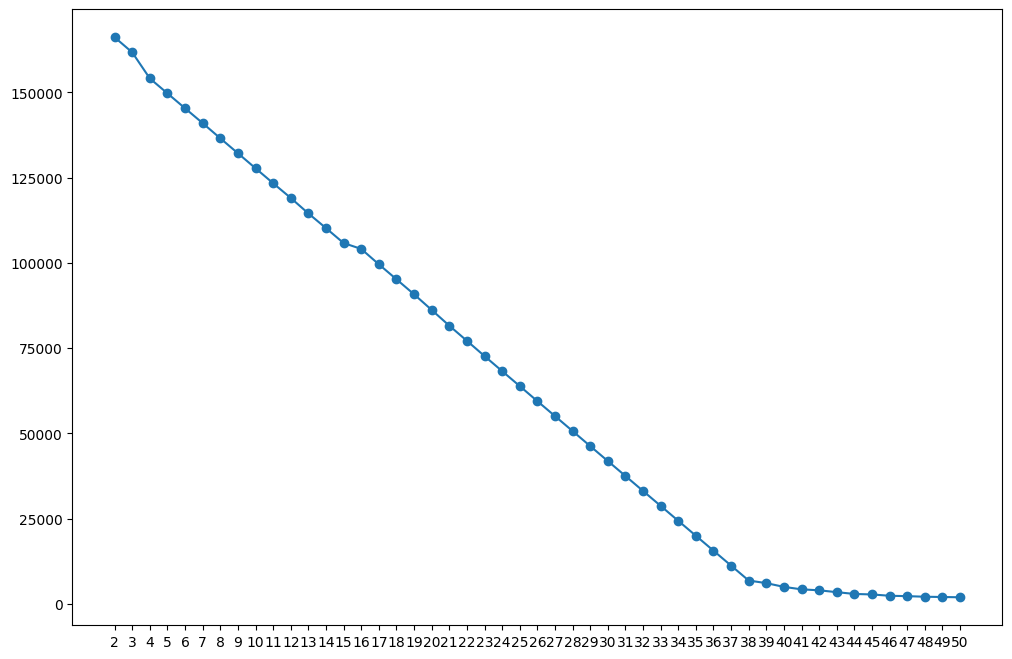

In [99]:
plt.figure(figsize=(12, 8))
plt.plot(list(range(2, 51)), inertia_list, marker="o")
plt.xticks(list(range(2, 51)))
plt.show()

### In this case the highest silhouette score was for k = 38, and from the inertia graph that is exactly where an elbow point is formed

### This sihouette score seems to be much higher than the one where we just used class numbers 0, 1, 2, ... for Country names

## Now Checking the Silhouette scores and inertiae for the previous transformed data for the same range of k

In [100]:
customer_group_bc_norm

array([[-0.9669464 , -2.07742208, -0.3979844 , -0.23451861],
       [ 0.72677594,  1.17528637,  0.57365906,  3.89981749],
       [ 1.55164738, -0.21920152,  0.09500126,  5.82917433],
       ...,
       [ 1.55164738, -0.87267091, -0.31712774, -0.23451861],
       [-0.9669464 ,  2.28845725,  0.14708591, -0.23451861],
       [ 0.72677594,  0.41539667,  0.10350523, -0.23451861]])

In [101]:
inertia_list = []
silhouette_scores = []

for i in range(2, 51):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customer_group_bc_norm)
    cluster_preds = kmeans.fit_predict(customer_group_bc_norm)
    
    silh_score = silhouette_score(customer_group_bc_norm, cluster_preds, random_state=42)
    silhouette_scores.append(silh_score)
    
    print(f"For k = {i}, Silhouette Score = {silh_score}")
    
    inertia_list.append(kmeans.inertia_)

For k = 2, Silhouette Score = 0.392903526351156
For k = 3, Silhouette Score = 0.42486597259947845
For k = 4, Silhouette Score = 0.457170931711404
For k = 5, Silhouette Score = 0.45059192180931
For k = 6, Silhouette Score = 0.4489007255078234
For k = 7, Silhouette Score = 0.44080191428507753
For k = 8, Silhouette Score = 0.44309890518001865
For k = 9, Silhouette Score = 0.44864034085062093
For k = 10, Silhouette Score = 0.45071208624299763
For k = 11, Silhouette Score = 0.43749984487148236
For k = 12, Silhouette Score = 0.4163279124103019
For k = 13, Silhouette Score = 0.4175331232223808
For k = 14, Silhouette Score = 0.39626465574288033
For k = 15, Silhouette Score = 0.38332804995959086
For k = 16, Silhouette Score = 0.3927605013887182
For k = 17, Silhouette Score = 0.38606542119212833
For k = 18, Silhouette Score = 0.3867666295708535
For k = 19, Silhouette Score = 0.3910613012467336
For k = 20, Silhouette Score = 0.3949668222981798
For k = 21, Silhouette Score = 0.3802416834751522
For

#### Plotting Silhouette values for different values of k

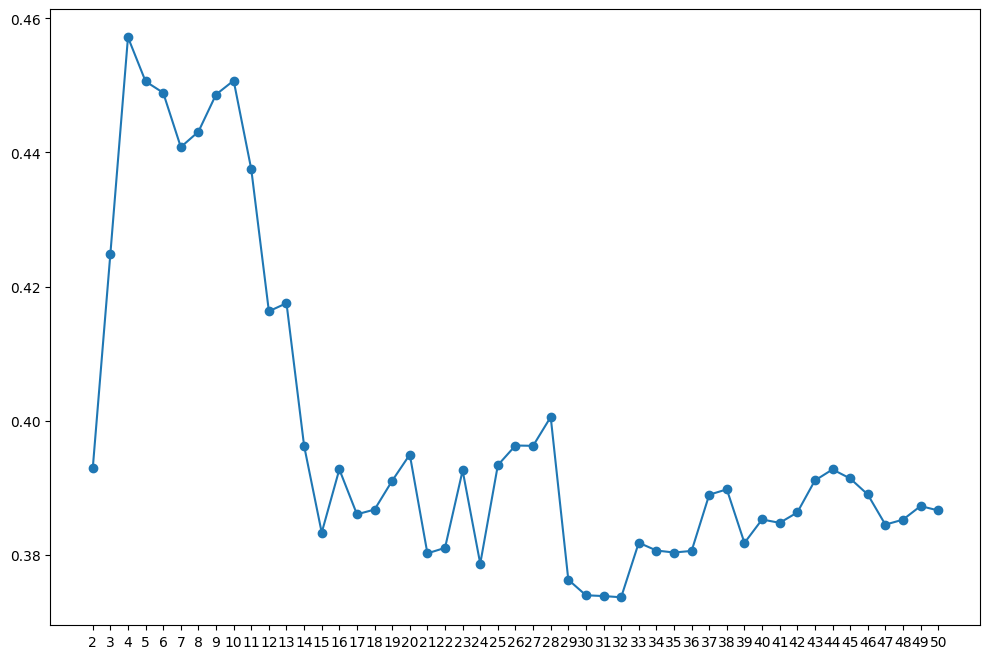

In [102]:
plt.figure(figsize=(12, 8))
plt.plot(list(range(2, 51)), silhouette_scores, marker="o")
plt.xticks(list(range(2, 51)))
plt.show()

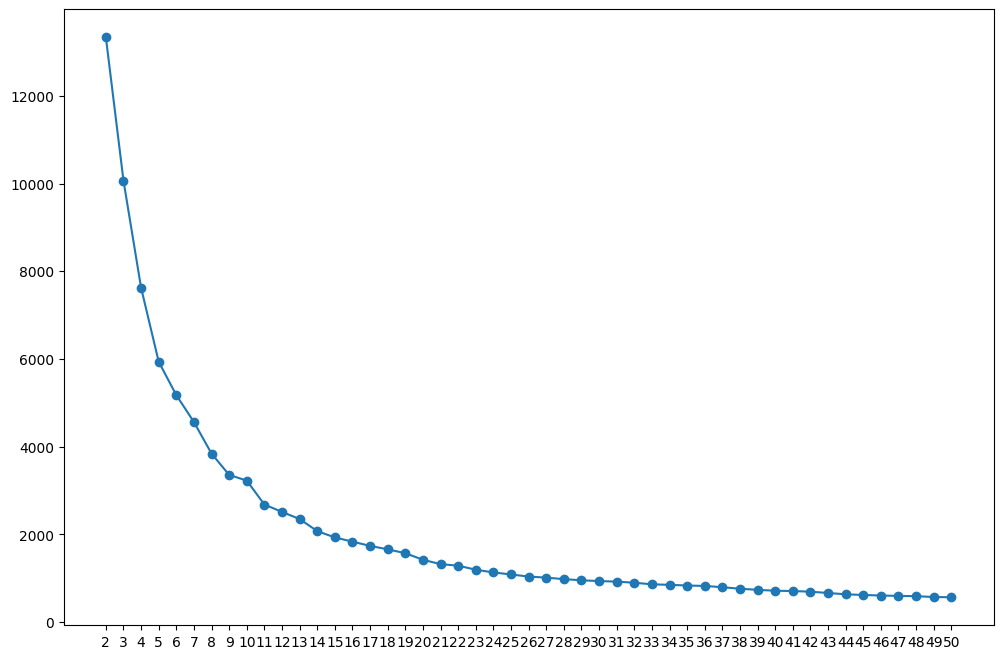

In [103]:
plt.figure(figsize=(12, 8))
plt.plot(list(range(2, 51)), inertia_list, marker="o")
plt.xticks(list(range(2, 51)))
plt.show()

#### So as seen above, for the first case of data transformation, despite having the same values of k, the highest silhouette score was for k = 4 and that is still lower than the one for the second case of data transformation, even the inertia elbow, is for k = 9 where is not as steep as the first one and is significantly higher.

In [104]:
customer_group2_bc_norm

array([[-0.9669464 , -2.07742208, -0.3979844 , ..., -0.02139313,
         0.32685692, -0.03026138],
       [ 0.72677594,  1.17528637,  0.57365906, ..., -0.02139313,
        -3.05944269, -0.03026138],
       [ 1.55164738, -0.21920152,  0.09500126, ..., -0.02139313,
        -3.05944269, -0.03026138],
       ...,
       [ 1.55164738, -0.87267091, -0.31712774, ..., -0.02139313,
         0.32685692, -0.03026138],
       [-0.9669464 ,  2.28845725,  0.14708591, ..., -0.02139313,
         0.32685692, -0.03026138],
       [ 0.72677594,  0.41539667,  0.10350523, ..., -0.02139313,
         0.32685692, -0.03026138]])

In [105]:
customer_group2_bc_norm.shape

(4372, 39)

## Let's use k = 38 and second dataset to predict cluster labels for each customer and then we can use that as a starting point for supervised learning classifiers

In [106]:
kmeans = KMeans(n_clusters=38, random_state=42)
kmeans.fit(customer_group2_bc_norm)
y = kmeans.predict(customer_group2_bc_norm)
centers = kmeans.cluster_centers_
y

array([ 1, 36,  9, ...,  0,  2,  0], dtype=int32)

In [107]:
y.shape

(4372,)

In [108]:
centers

array([[ 1.10982063, -0.11057233, -0.10577426, ..., -0.02139313,
         0.31321165, -0.03026138],
       [-0.95875172, -0.74419854, -0.30047387, ..., -0.02139313,
         0.3245735 , -0.03026138],
       [-0.1915153 ,  1.23700285,  0.5270963 , ..., -0.02139313,
         0.31999511, -0.03026138],
       ...,
       [ 0.24832359,  1.35972648,  1.3391085 , ..., -0.02139313,
        -3.05944269, -0.03026138],
       [ 0.72677594,  1.17528637,  0.57365906, ..., -0.02139313,
        -3.05944269, -0.03026138],
       [-0.9669464 , -1.06238671, -0.33396679, ..., -0.02139313,
        -3.05944269, -0.03026138]])

In [109]:
centers.shape

(38, 39)

In [110]:
untransformed_centers = pt.inverse_transform(scaler2.inverse_transform(centers)[:, :3])

D:\Anaconda3\envs\pmlapp_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


In [111]:
untransformed_centers

array([[3.64588015e+00, 3.56921357e+01, 9.16620856e+02],
       [3.70448574e-03, 1.54787328e+01, 2.24293084e+02],
       [4.94088588e-01, 1.96557451e+02, 4.04548040e+03],
       [3.01888359e-01, 6.46714317e+01, 3.13179944e+03],
       [6.24108594e-01, 5.26387252e+01, 1.88679568e+03],
       [4.24386598e-01, 3.36442205e+01, 1.02316072e+03],
       [6.86427183e-01, 3.95437757e+01, 8.21849224e+02],
       [3.77798606e-01, 6.54458192e+01, 2.51663914e+03],
       [7.54461024e-01, 6.05187946e+01, 1.62306892e+03],
       [5.59464869e-01, 3.39930513e+01, 1.63533073e+03],
       [6.71887045e-01, 3.95470279e+01, 3.30175292e+03],
       [4.83806885e-01, 4.89249988e+01, 1.37134111e+03],
       [6.02429810e-01, 4.81229398e+01, 6.58192176e+02],
       [2.71217883e-01, 2.84760294e+01, 7.29919808e+02],
       [1.33217882e+00, 3.52096335e+01, 1.93617335e+03],
       [6.32827156e-01, 5.61173899e+01, 2.00843320e+03],
       [8.77603758e-01, 2.66598281e+01, 9.93263301e+02],
       [2.15902616e-01, 5.70355

In [112]:
customer_group2

,VisitGapMean,Frequency,Monetary
CustomerID,,,
12346,0,2,0.00
12347,2,182,4310.00
12348,9,31,1797.24
12349,0,73,1757.55
12350,0,17,334.40
...,...,...,...
18280,0,10,180.60
18281,0,7,80.82
18282,9,13,176.60


##### Plotting Monetary x Frequency clusters for untransformed data

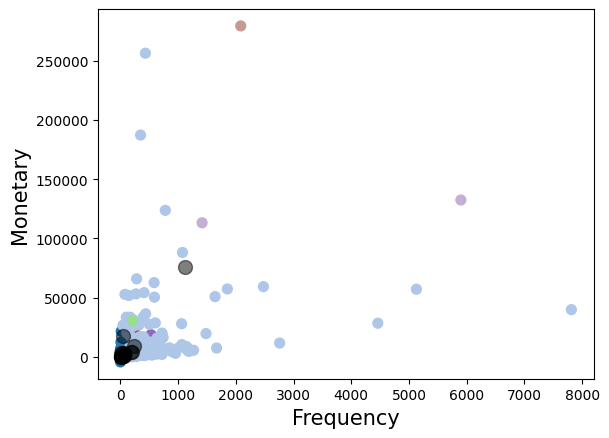

In [113]:
plt.scatter(customer_group2['Frequency'], customer_group2['Monetary'], c=y, s=50, cmap='tab20')
plt.scatter(untransformed_centers[:, 1], untransformed_centers[:, 2], c='black', s=100, alpha=0.5)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Monetary', fontsize=15)
plt.show()

##### Plotting Monetary x Frequency clusters for transformed data

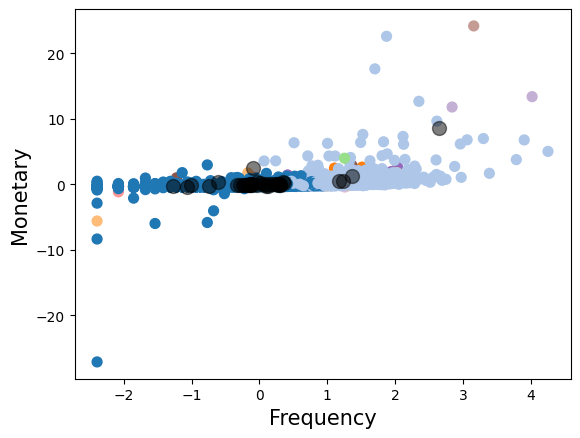

In [114]:
plt.scatter(customer_group2_bc_norm[:, 1], customer_group2_bc_norm[:, 2], c=y, s=50, cmap='tab20')
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=100, alpha=0.5)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Monetary', fontsize=15)
plt.show()

##### Plotting Monetary x VisitGapMean clusters for untransformed data

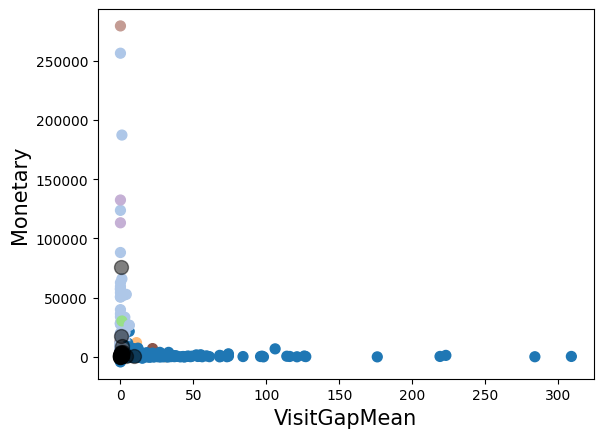

In [115]:
plt.scatter(customer_group2['VisitGapMean'], customer_group2['Monetary'], c=y, s=50, cmap='tab20')
plt.scatter(untransformed_centers[:, 0], untransformed_centers[:, 2], c='black', s=100, alpha=0.5)
plt.xlabel('VisitGapMean', fontsize=15)
plt.ylabel('Monetary', fontsize=15)
plt.show()

##### Plotting Monetary x VisitGapMean clusters for transformed data

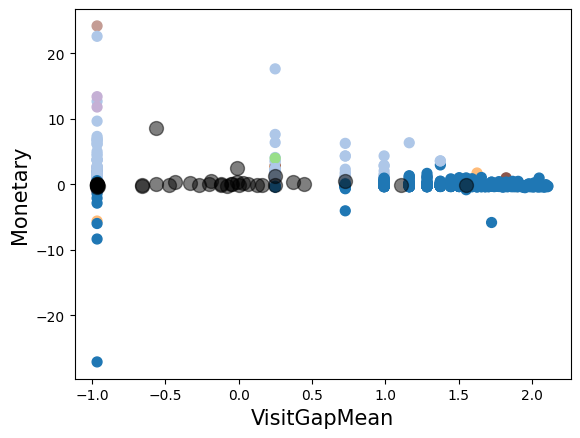

In [116]:
plt.scatter(customer_group2_bc_norm[:, 0], customer_group2_bc_norm[:, 2], c=y, s=50, cmap='tab20')
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=100, alpha=0.5)
plt.xlabel('VisitGapMean', fontsize=15)
plt.ylabel('Monetary', fontsize=15)
plt.show()

##### Plotting VisitGapMean x Frequency clusters for untransformed data

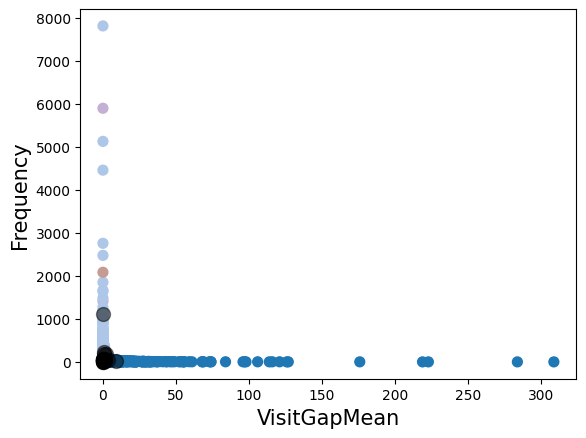

In [117]:
plt.scatter(customer_group2['VisitGapMean'], customer_group2['Frequency'], c=y, s=50, cmap='tab20')
plt.scatter(untransformed_centers[:, 0], untransformed_centers[:, 1], c='black', s=100, alpha=0.5)
plt.xlabel('VisitGapMean', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

##### Plotting VisitGapMean x Frequency clusters for transformed data

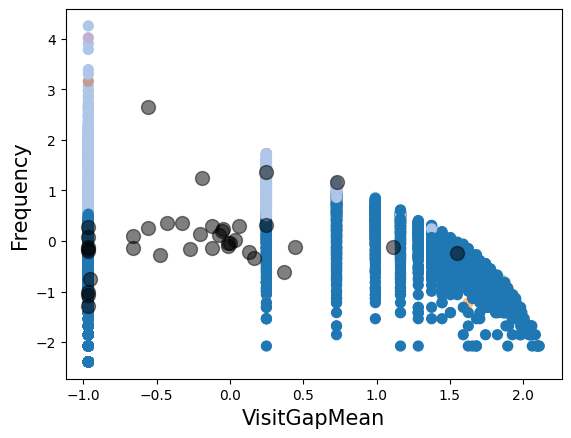

In [118]:
plt.scatter(customer_group2_bc_norm[:, 0], customer_group2_bc_norm[:, 1], c=y, s=50, cmap='tab20')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.xlabel('VisitGapMean', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

## Now splitting the data into training and testing data with a split ratio of 80:20

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(customer_group2_bc_norm, y, test_size=0.2, random_state=42)

In [121]:
X_train.shape

(3497, 39)

In [122]:
X_train.dtype

dtype('float64')

In [123]:
X_test.shape

(875, 39)

In [124]:
X_test.dtype

dtype('float64')

In [125]:
y_train.shape

(3497,)

In [126]:
y_train.dtype

dtype('int32')

In [127]:
y_test.shape

(875,)

In [128]:
y_test.dtype

dtype('int32')

## Now that we have a good idea of which transformed data to use and how many classes to predict we can go ahead with model predictions

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Using data where dummy variables were added and using k = 38 or number of class = 38

In [130]:
k = 38

In [131]:
classification_models = {
    'KNN': KNeighborsClassifier(n_neighbors=k),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

In [132]:
from sklearn.metrics import classification_report

#### For Train Data

In [133]:
for name, model in classification_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    print(f"Training Classification Report for {name}:\n", classification_report(y_train, y_pred))

D:\Anaconda3\envs\pmlapp_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda3\envs\pmlapp_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda3\envs\pmlapp_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1198
           1       0.95      0.99      0.97      1190
           2       0.94      0.98      0.96       791
           3       0.00      0.00      0.00         8
           4       1.00      1.00      1.00        63
           5       0.00      0.00      0.00        12
           6       1.00      1.00      1.00        25
           7       0.00      0.00      0.00        14
           8       1.00      0.07      0.13        14
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00         5
          11       1.00      0.65      0.79        17
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         6
          15       1.00      1.00      1.00        74
          16       0.00      0.00      0

##### We are getting very high training accuracy. Either the models are working really well or they are overfitting

In [134]:
for name, model in classification_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Testing Classification Report for {name}:\n", classification_report(y_test, y_pred))

Testing Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       295
           1       0.93      0.99      0.96       294
           2       0.94      0.97      0.96       191
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00        24
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00         5
           7       1.00      0.17      0.29         6
           8       1.00      0.11      0.20         9
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       1.00      1.00      1.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         3
          15       1.00      1.00      1.00        21
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.

D:\Anaconda3\envs\pmlapp_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda3\envs\pmlapp_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda3\envs\pmlapp_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda3\envs\pmlapp_env

Testing Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       295
           1       0.99      0.99      0.99       294
           2       0.99      0.97      0.98       191
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00         3
           6       1.00      0.80      0.89         5
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00         1
          18       1.00  

D:\Anaconda3\envs\pmlapp_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda3\envs\pmlapp_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda3\envs\pmlapp_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda3\envs\pmlapp_env\Lib\sit

##### Even on the test set all the model seem to perform really close to the training set results, which means the model is most likely not over-fitting

##### (Note to Professor: The warnings in the classification reports are due to the training and testing set not having samples from all classes. During the train_test_split I tried using the stratify parameter, but since a few classes have just one sample, stratify raises an issue that it cannot split since there is just one instance of that class. Hence I went ahead with regular train_test_split and thus classification throws a warning everytime a class is missing from the dataset.)

## Using Ensemble Models to get the best output out of predictions of all the above models

In [135]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [136]:
voting_clf = VotingClassifier(estimators=[
    ('KNN', classification_models['KNN']),
    ('Decision Tree', classification_models['Decision Tree']),
    ('Random Forest', classification_models['Random Forest']),
    ('Logistic Regression', classification_models['Logistic Regression'])
], voting='hard')

In [137]:
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_train)
print(f"Voting Classifier Train Accuracy: {voting_clf.score(X_train, y_train)}")

Voting Classifier Train Accuracy: 0.9971404060623391


In [138]:
y_pred_voting = voting_clf.predict(X_test)
print(f"Voting Classifier Test Accuracy: {voting_clf.score(X_test, y_test)}")

Voting Classifier Test Accuracy: 0.9897142857142858


In [139]:
from sklearn.svm import SVC

In [140]:
stacking_clf = StackingClassifier(estimators=[
    ('KNN', classification_models['KNN']),
    ('Decision Tree', classification_models['Decision Tree']),
    ('Random Forest', classification_models['Random Forest']),
    ('Logistic Regression', classification_models['Logistic Regression'])
    ],
    final_estimator=SVC()
)

In [141]:
stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_train)
print(f"Stacking Classifier Accuracy: {stacking_clf.score(X_train, y_train)}")

D:\Anaconda3\envs\pmlapp_env\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
D:\Anaconda3\envs\pmlapp_env\Lib\site-packages\sklearn\model_selection\_validation.py:1415: RuntimeWarning: Number of classes in training fold (35) does not match total number of classes (37). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
D:\Anaconda3\envs\pmlapp_env\Lib\site-packages\sklearn\model_selection\_validation.py:1415: RuntimeWarning: Number of classes in training fold (33) does not match total number of classes (37). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
D:\Anaconda3\envs\pmlapp_env\Lib\site-packages\sklearn\model_selection\_validation.py:1415: RuntimeWarning: Numb

Stacking Classifier Accuracy: 0.9954246496997426


In [142]:
y_pred_stacking = stacking_clf.predict(X_test)
print(f"Stacking Classifier Accuracy: {stacking_clf.score(X_test, y_test)}")

Stacking Classifier Accuracy: 0.9828571428571429


#### If I had to select just one ensemble model, I would go with VotingClassifier as it seems to be giving somewhat better results currently.
#### If I had to pick just 2 models from the 4 models, I would pick Logistic Regression and Random Forest since they are giving great results

In [143]:
voting_clf = VotingClassifier(estimators=[
    ('Random Forest', classification_models['Random Forest']),
    ('Logistic Regression', classification_models['Logistic Regression'])
], voting='hard')

In [144]:
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_train)
print(f"Voting Classifier Accuracy: {voting_clf.score(X_train, y_train)}")

Voting Classifier Accuracy: 0.9948527309122105


In [145]:
y_pred_voting = voting_clf.predict(X_test)
print(f"Voting Classifier Accuracy: {voting_clf.score(X_test, y_test)}")

Voting Classifier Accuracy: 0.9828571428571429


In [146]:
y_pred_voting

array([ 0,  0,  1,  0,  0,  0,  1,  2,  2,  1,  1,  1,  1,  4,  1,  2,  0,
        1,  1,  0,  0,  2,  0,  1,  0,  0, 10,  0,  1,  8,  0,  1,  0,  0,
        0,  1,  0,  2,  4,  0,  0,  0,  2,  1,  1,  2,  1,  0,  0,  2,  2,
        1,  1,  0,  2,  2,  2,  2,  1,  0,  7, 15,  1,  4,  4,  1,  2,  1,
        0,  1,  2,  1,  1,  0,  1,  0,  1,  2,  0,  0,  2,  0,  0,  1,  0,
        0,  0,  1,  0,  1,  2,  0,  1, 15,  2,  0,  2,  0,  0, 15,  1,  0,
        1,  1,  0,  0,  2,  2,  0, 15,  0,  0,  4,  1,  0,  1,  0,  1,  1,
        1,  0,  2,  1,  2,  1,  2,  1, 15,  1,  2,  1,  0,  0,  1,  2,  2,
        1,  1,  4,  0,  3,  0, 15,  0,  0,  0,  2,  0,  1,  0,  2,  1,  1,
        0,  0,  5,  1,  0,  2,  1,  0,  0,  4,  2,  2,  2,  1,  4,  0,  0,
        4,  1,  8,  0,  1,  1,  0,  0,  0,  0,  1,  0,  8,  0,  4,  2,  0,
        1,  2,  2,  0,  0,  0,  0,  1,  0,  2,  0,  1,  2,  2,  1,  0,  2,
        0,  2,  2,  0,  1, 15,  2,  0,  0,  0,  1,  0,  2,  4,  0,  2,  1,
        2,  2,  1,  1,  1

In [147]:
np.unique(y_pred_voting)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 14, 15, 16, 18, 19,
       21, 22, 23, 25, 27, 28, 31], dtype=int32)

## In this way, the customers can be segmented into 38 classes which, on analyzing few samples from each cluster, can give valuable insights about each cluster and that can then be used for targeted marketing campaigns.